In [4]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [5]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch
torch.manual_seed(42)
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('sox_io')

import matplotlib.pyplot as plt
import requests
from utils import *
from wingbeat_datasets import *
from wingbeat_models import *


In [6]:
num_epochs = 35
batch_size = 32
batch_size_val = batch_size * 2
validation_split = .2
shuffle_dataset = True
num_workers = psutil.cpu_count()
random_seed= 42
setting = 'raw'
modeltype = 'wingbeatraw'
normalize = ''#"sample"

fs = 8000

In [7]:
dsname = "twin_cages_experiment/sensorSD/freeflight"
transforms_list = [FilterWingbeat(setting='bandpass')]#, TransformWingbeat(setting='psd')]

wbdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
psdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)

Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.
Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.
Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


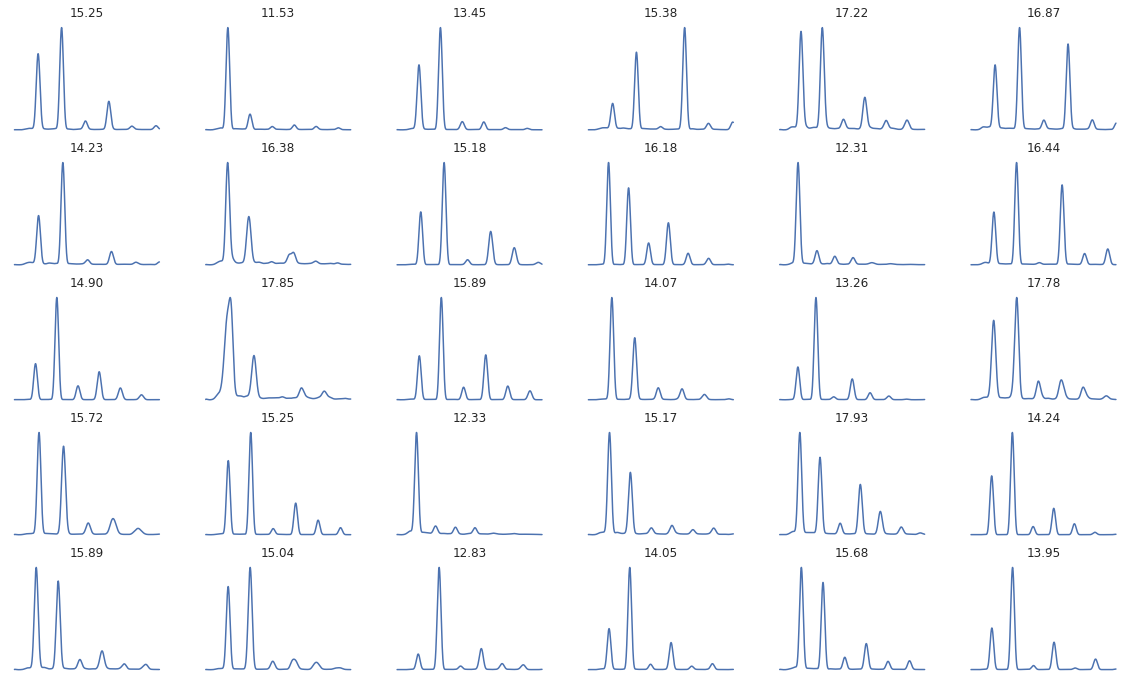

In [36]:
rands = np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

plt.figure(figsize=(20,12))
for i in range(30):
    plt.subplot(5,6,i+1)
    
    sig = psdset[rands[i]][0][0,:1600]
    plt.plot(sig.T)
#     plt.title(f"{psdset.sums[i]:.1f}", y=.6)
    plt.title(f"{sig.sum():.2f}")
    plt.axis('off')

Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.
Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.


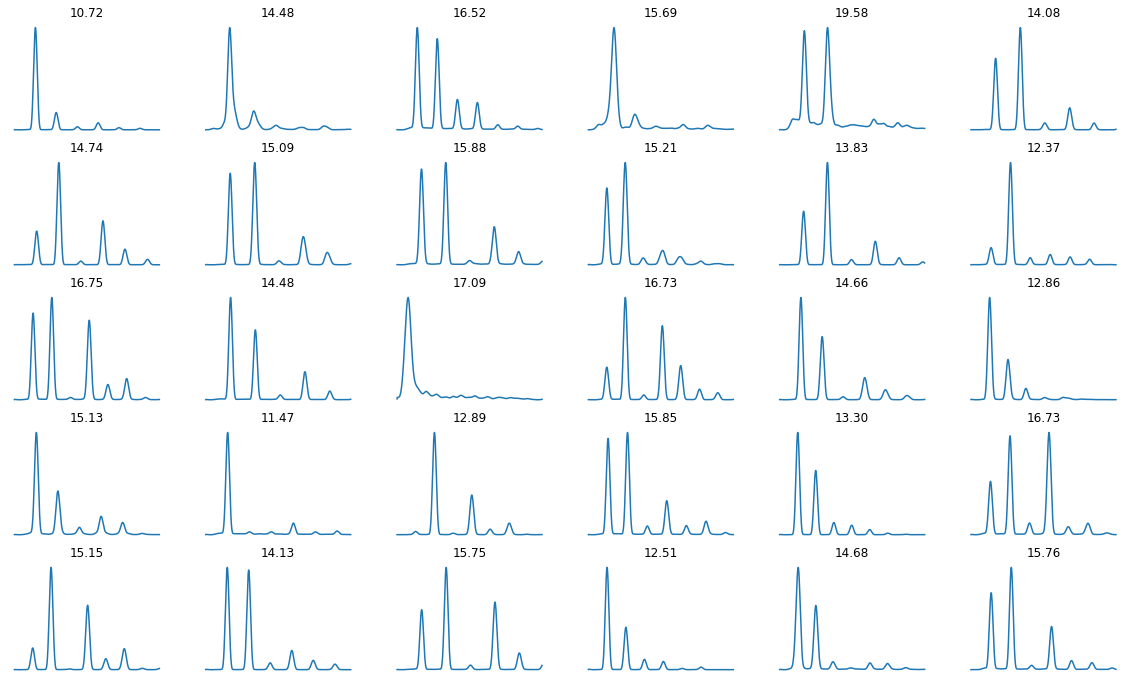

In [114]:
dsname = "twin_cages_experiment/sensorSD/through_entrances_v2"
transforms_list = [FilterWingbeat(setting='bandpass')]#, TransformWingbeat(setting='psd')]

wbdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
psdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)

rands = np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

plt.figure(figsize=(20,12))
for i in range(30):
    plt.subplot(5,6,i+1)
    
    sig = psdset[rands[i]][0][0,:1600]
    plt.plot(sig.T)
#     plt.title(f"{psdset.sums[i]:.1f}", y=.6)
    plt.title(f"{sig.sum():.2f}")
    plt.axis('off')

Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.
Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


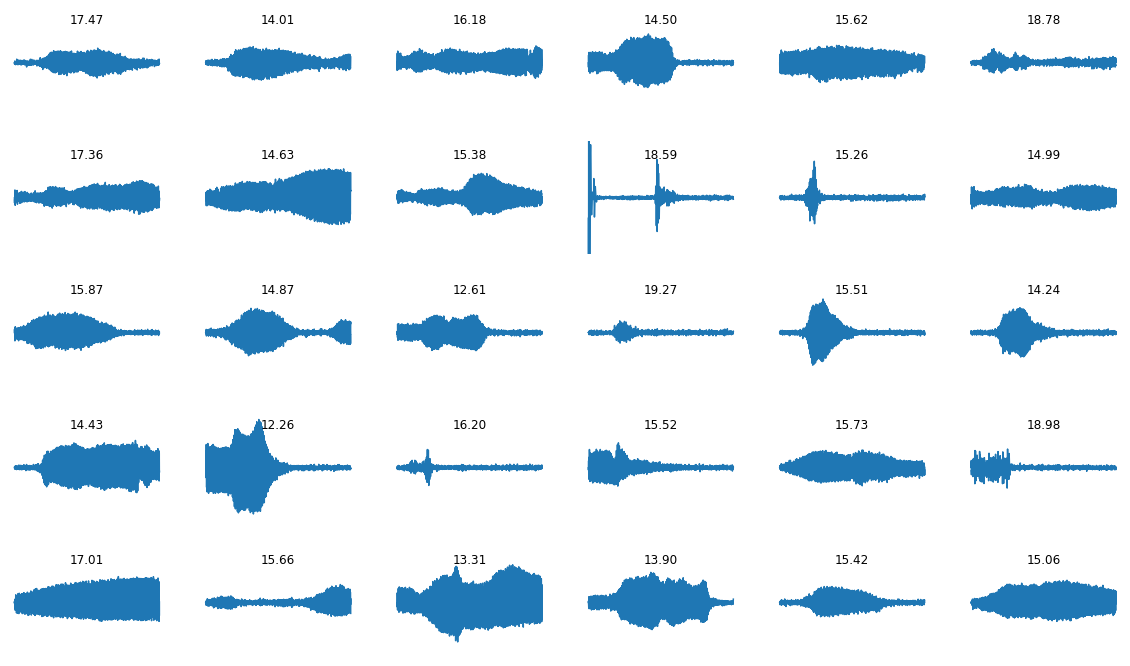

In [115]:
dsname = "twin_cages_experiment/sensorSD/freeflight"
transforms_list = [FilterWingbeat(setting='bandpass')]#, TransformWingbeat(setting='psd')]

wbdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
psdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)

rands = np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

plt.figure(figsize=(20,12))
for i in range(30):
    plt.subplot(5,6,i+1)
    
    sig = wbdset[rands[i]][0]
    plt.plot(sig.T)
    plt.title(f"{wbdset.sums[rands[i]]:.2f}", y=.8)#, absum:{sig.abs().sum():.4f}")
    plt.axis('off')
    plt.ylim(-.065,.065)

Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.
Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.


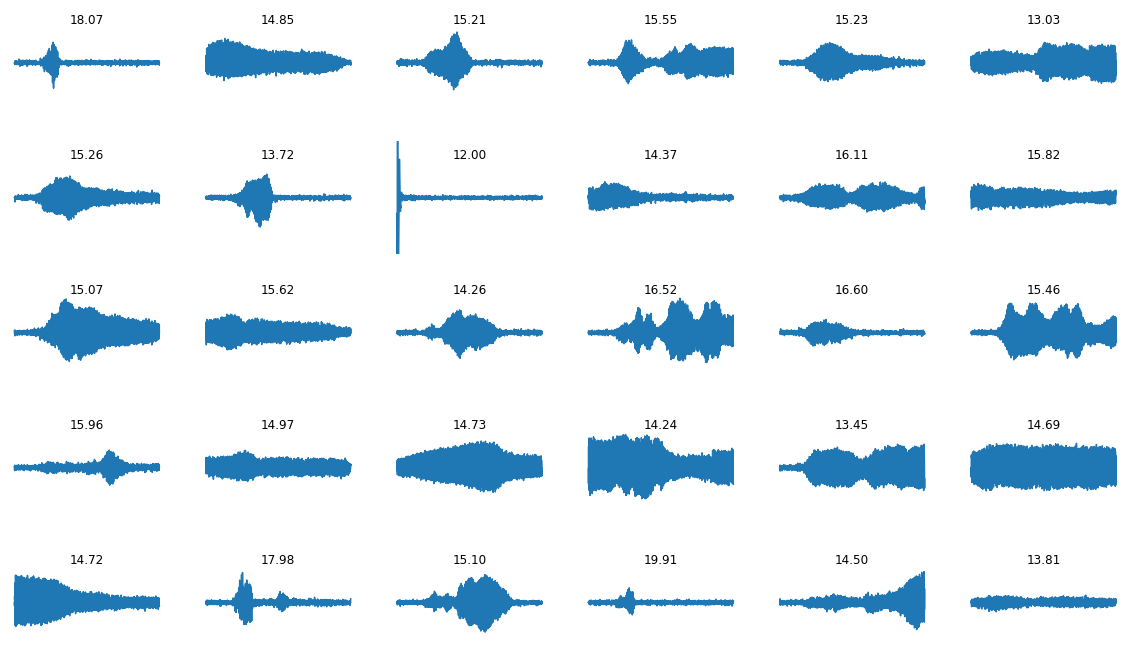

In [117]:
dsname = "twin_cages_experiment/sensorSD/through_entrances_v2"
transforms_list = [FilterWingbeat(setting='bandpass')]#, TransformWingbeat(setting='psd')]

wbdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
psdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)

rands = np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

plt.figure(figsize=(20,12))
for i in range(30):
    plt.subplot(5,6,i+1)
    
    sig = wbdset[rands[i]][0]
    plt.plot(sig.T)
    plt.title(f"{wbdset.sums[rands[i]]:.2f}", y=.8)#, absum:{sig.abs().sum():.4f}")
    plt.axis('off')
    plt.ylim(-.065,.065)

Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.
Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


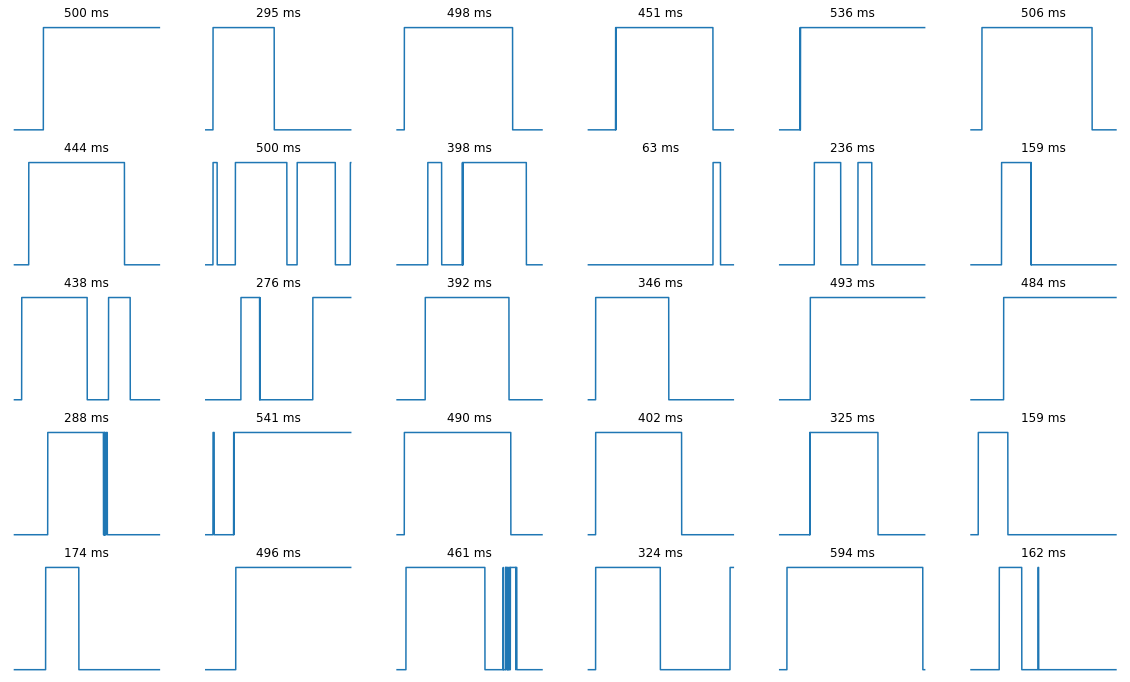

In [118]:
dsname = "twin_cages_experiment/sensorSD/freeflight"
transforms_list = [FilterWingbeat(setting='bandpass')]#, TransformWingbeat(setting='psd')]

wbdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
psdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)

rands = np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

plt.figure(figsize=(20,12))
for i in range(30):
    plt.subplot(5,6,i+1)

    sig = wbdset[rands[i]][0]
    sig = pd.Series(sig.squeeze())
    sig = sig.abs().rolling(250).mean()
    sig = (sig>0.0025).astype(int)
    sig.plot()
    plt.title(f"{wingbeat_duration(sig, rolling_window=250,fs=fs):.0f} ms")
    plt.axis('off')

Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.
Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.


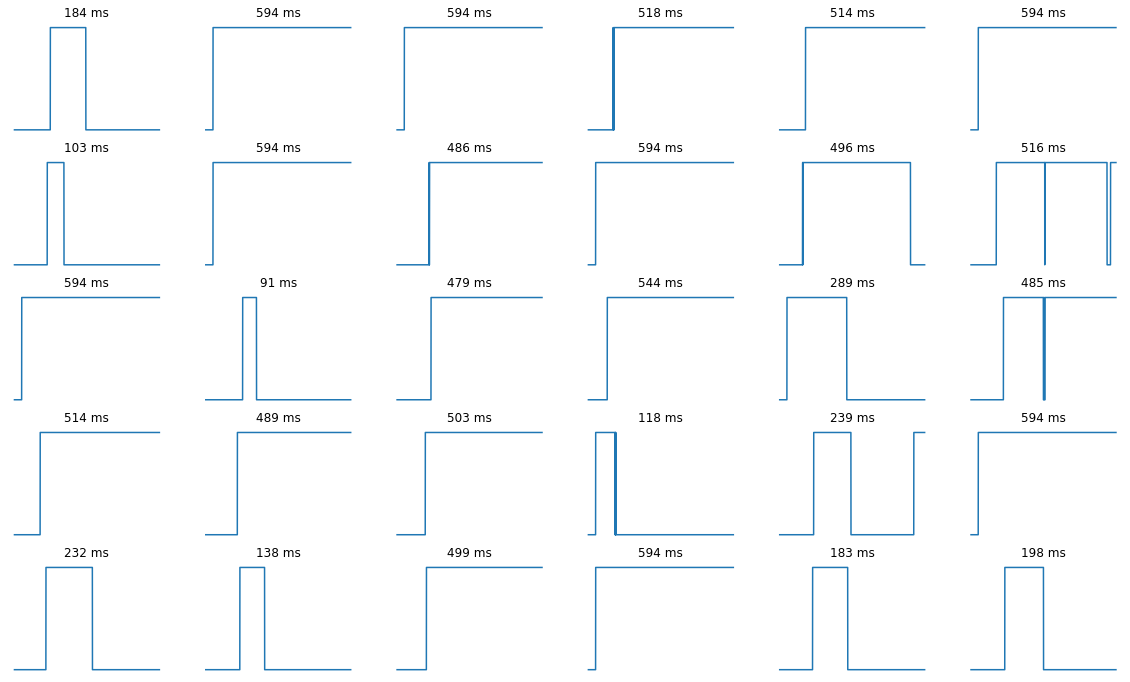

In [119]:
dsname = "twin_cages_experiment/sensorSD/through_entrances_v2"
transforms_list = [FilterWingbeat(setting='bandpass')]#, TransformWingbeat(setting='psd')]

wbdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
psdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)

rands = np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

plt.figure(figsize=(20,12))
for i in range(30):
    plt.subplot(5,6,i+1)

    sig = wbdset[rands[i]][0]
    sig = pd.Series(sig.squeeze())
    sig = sig.abs().rolling(250).mean()
    sig = (sig>0.0025).astype(int)
    sig.plot()
    plt.title(f"{wingbeat_duration(sig, rolling_window=250,fs=fs):.0f} ms")
    plt.axis('off')

## Calculate mean flight duration for datasets

In [121]:
dsname = "twin_cages_experiment/sensorSD/through_entrances_v2"

wbdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_WBduration_from_loader(dloader, fs=fs)[1:]

  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.


100%|██████████| 5/5 [00:00<00:00, 18.66it/s]


(403.00085616438355, 491.4375, 195.35834680896377)

In [147]:
sample = 146

dsname = "twin_cages_experiment/sensorSD/freeflight"

trials = []
for i in range(100):
    wbdset = WingbeatsDataset(dsname=dsname, sample=sample, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
    dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
    trials.append(get_WBduration_from_loader(dloader, fs=fs)[1:])

  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


100%|██████████| 5/5 [00:00<00:00, 18.27it/s]


[(338.4931506849315, 344.5625, 177.82361957601213),
 (340.1489726027397, 349.5625, 173.94535331742918),
 (354.9443493150685, 359.6875, 180.21583867215858),
 (362.8681506849315, 372.3125, 177.7418125322935),
 (354.27311643835617, 359.0625, 161.60077595235813),
 (354.1027397260274, 371.4375, 173.80545562543523),
 (345.5265410958904, 308.6875, 168.61206577887867),
 (342.0196917808219, 350.4375, 170.99031823931753),
 (354.07705479452056, 378.6875, 181.47046066810125),
 (371.3527397260274, 383.375, 169.6838182544977),
 (355.923801369863, 370.5625, 166.69022809767546),
 (337.6986301369863, 367.3125, 178.0419631442171),
 (353.31849315068496, 360.875, 163.78745786295377),
 (332.69777397260276, 309.1875, 172.18348390938934),
 (347.9092465753425, 355.0, 172.9186164882182),
 (358.28767123287673, 362.75, 165.6026460553567),
 (346.9691780821918, 377.3125, 173.66812681347085),
 (357.1095890410959, 363.0625, 169.74729145407738),
 (315.9957191780822, 285.125, 185.8784715007691),
 (351.416095890411, 35

In [159]:
print(f"mean: {np.mean([trials[i][0] for i in range(len(trials))])}")
print(f"median: {np.mean([trials[i][1] for i in range(len(trials))])}")

mean: 349.55356164383556
median: 354.370625


## Power Spectral Density of datasets

In [407]:
sample = 146

trials = []
for i in range(10):
    psdset1 = WingbeatsDataset(dsname="twin_cages_experiment/sensorSD/freeflight", sample=sample, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
    dloader1 = DataLoader(psdset1, batch_size=32, num_workers=16)
    trials.append(get_medianWBDset_psd_from_loader(dloader1))
psds_sampled = pd.concat(trials, axis=1)

  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


100%|██████████| 5/5 [00:00<00:00,  6.67it/s]


In [415]:
psds = psds_sampled.iloc[:1600,:].T
# psds.median()

0       0.000142
1       0.000284
2       0.000282
3       0.000281
4       0.000278
          ...   
1595    0.000323
1596    0.000320
1597    0.000318
1598    0.000315
1599    0.000310
Length: 1600, dtype: float32

<AxesSubplot:>

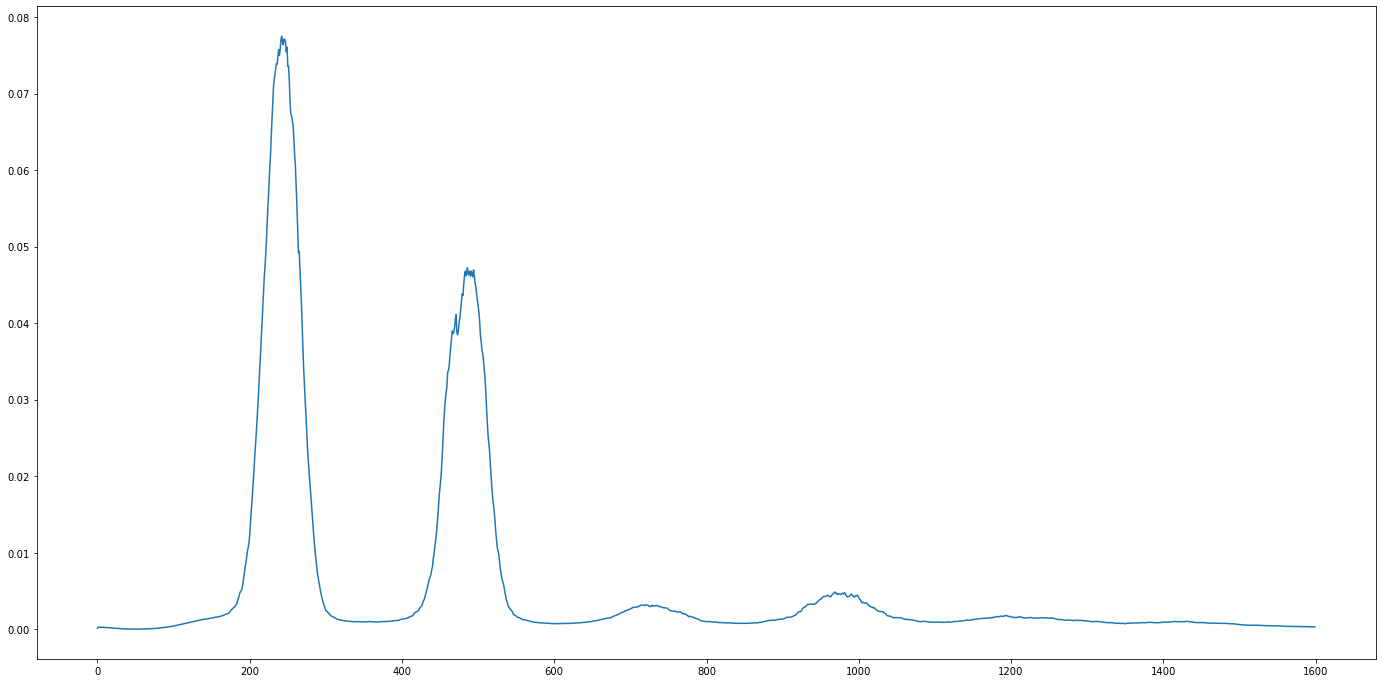

In [417]:
plt.figure(figsize=(24,12))
psds.median().plot()

  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.
Found 146 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.
Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.


100%|██████████| 5/5 [00:00<00:00,  6.93it/s]


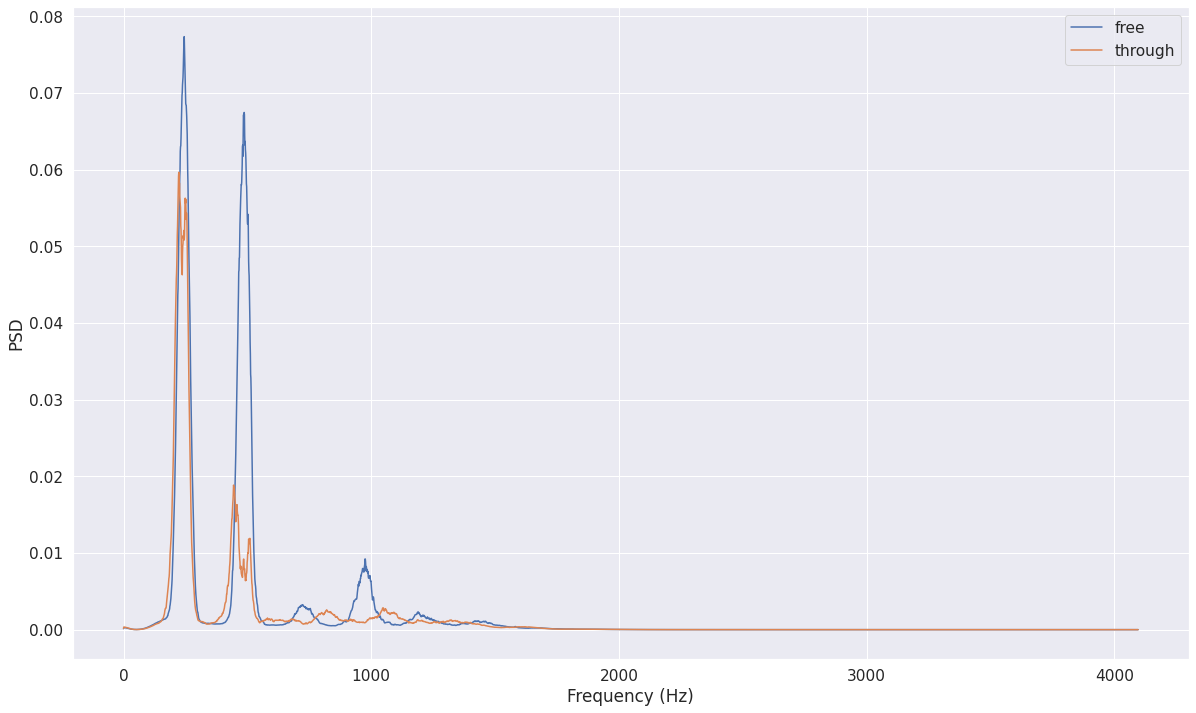

In [421]:
sample = 146

import seaborn as sns
sns.set(font_scale=1.4)
plt.figure(figsize=(20,12))
wbdset1 = WingbeatsDataset(dsname="twin_cages_experiment/sensorSD/freeflight", sample=sample, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass')]))
psdset1 = WingbeatsDataset(dsname="twin_cages_experiment/sensorSD/freeflight", sample=sample, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader1 = DataLoader(psdset1, batch_size=32, num_workers=16)
get_medianWBDset_psd_from_loader(dloader1).plot();

wbdset2 = WingbeatsDataset(dsname="twin_cages_experiment/sensorSD/through_entrances_v2", clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass')]))
psdset2 = WingbeatsDataset(dsname="twin_cages_experiment/sensorSD/through_entrances_v2", clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader2 = DataLoader(psdset2, batch_size=32, num_workers=16)
get_medianWBDset_psd_from_loader(dloader2).plot();

plt.legend(['free','through']); plt.ylabel('PSD'); plt.xlabel('Frequency (Hz)');

In [48]:
psdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))

Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


In [57]:
mat = np.array([wbdset1[i][0].numpy() for i in range(len(wbdset1))])

In [58]:
mat = mat.squeeze()

In [59]:
mat.shape

(915, 5000)

In [60]:
df = pd.DataFrame()
for i, ts in enumerate(mat):
    data = [[x, i] for x in ts]
    df = df.append(data, ignore_index=True)
df.columns = ['value', 'id']

In [61]:
import tsfresh
tf=tsfresh.extract_features(df, column_id='id')

Feature Extraction: 100%|██████████| 40/40 [41:44<00:00, 62.61s/it]  


In [62]:
tf

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_2,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1
0,0.0,0.0,0.0,0.0,-0.003906,0.093989,0.000973,-2.189531e-07,1.096075e-07,0.000002,...,0.110453,0.155665,0.200814,0.294982,0.990854,1.455481,2.288713,3.218305,4.234031,5.289679
1,0.0,0.0,0.0,1.0,0.034213,0.454642,0.003008,3.909206e-07,-1.800501e-07,0.000669,...,0.045395,0.125256,0.125256,0.262742,0.721454,1.381484,2.137584,2.970017,3.825840,4.669081
2,0.0,0.0,0.0,0.0,0.002162,0.146174,0.002000,-9.297725e-07,-1.698478e-07,-0.000291,...,0.110453,0.155665,0.215617,0.305728,1.090888,1.345854,2.100951,2.937603,3.794188,4.641345
3,0.0,0.0,0.0,0.0,-0.005880,0.036279,0.000768,-7.760970e-08,1.534881e-07,0.000090,...,0.079983,0.090729,0.136002,0.215617,0.899600,1.419785,2.222572,3.107873,4.066703,5.054948
4,0.0,0.0,0.0,0.0,-0.002340,0.261718,0.002832,3.720807e-07,-2.374039e-08,-0.000561,...,0.079983,0.155665,0.228465,0.249958,0.716142,1.335881,2.096635,2.914837,3.742204,4.542038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.0,0.0,0.0,0.0,0.002252,0.388046,0.003160,3.612266e-06,-3.931207e-07,-0.000512,...,0.138228,0.217718,0.262742,0.420705,0.867562,1.414323,2.205296,3.090719,4.043628,5.007627
911,0.0,0.0,0.0,0.0,0.001096,0.461996,0.003194,-2.654416e-07,-2.039353e-08,-0.000500,...,0.110453,0.190068,0.269433,0.456757,0.907649,1.426670,2.234980,3.113647,4.068750,5.058254
912,0.0,0.0,0.0,0.0,0.004801,0.108086,0.001430,-7.593783e-08,-3.806100e-08,-0.000017,...,0.163982,0.217718,0.327050,0.566133,1.241194,1.440097,2.259629,3.169077,4.166160,5.201367
913,0.0,0.0,0.0,0.0,0.005343,0.375699,0.003592,-1.708149e-06,-3.123229e-07,0.000014,...,0.163982,0.190068,0.269433,0.431208,0.830158,1.400108,2.145137,2.945774,3.824047,4.749967


In [63]:
# tf.to_csv('./data_created/tsfresh_free_SD.csv')

In [180]:
def stack_dataset(d):
    return np.array([d[i][0].numpy() for i in range(len(d))]).squeeze()

# Raw wingbeat

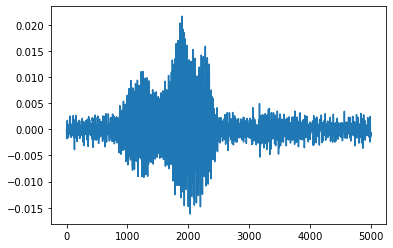

In [217]:
plt.plot(wbdset1[0][0].numpy().T)

## Absolute values of raw wingbeat

##### Looking at the MAX of the absolute raw signals for all "free-flight" and all "through-entrances" signals

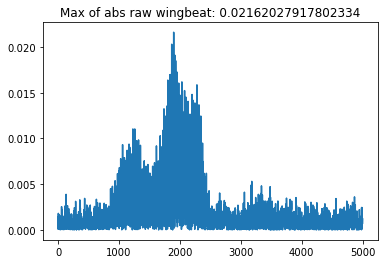

In [240]:
plt.plot(np.abs(wbdset1[0][0].numpy().T));
plt.title(f"Max of abs raw wingbeat: {np.max(np.abs(wbdset1[0][0].numpy().T))}");

#### ***For "free-flight": 100 trials sampling 146 free-flight signals (out of 915 total) with replacement***
##### measuring median (over these 146) of the MAX amplitudes

In [ ]:
sample = 146

dsname = "twin_cages_experiment/sensorSD/freeflight"

trials = []
for i in range(100):
    wbdset = WingbeatsDataset(dsname=dsname, sample=sample, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
    wbdset = np.abs(stack_dataset(wbdset))
    trials.append(np.median(np.apply_along_axis(np.max, 1, wbdset))) # MEDIAN

<AxesSubplot:>

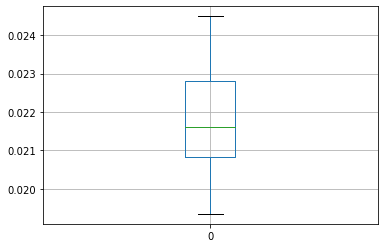

In [262]:
pd.DataFrame(trials).boxplot(showfliers=True);

#### ***For "through-entrances": median (over 146 signals) of max amplitudes***

In [259]:
wbd2 = np.abs(stack_dataset(wbdset2))
print(f"{np.median(np.apply_along_axis(np.max, 1, wbd2)):.4f}")

0.0277


### Now looking at the MEAN (instead of MAX) of the absolute raw signals for all "free-flight" and all "through-entrances" signals

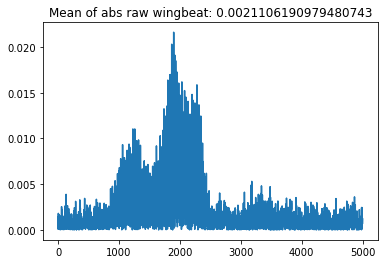

In [244]:
plt.plot(np.abs(wbdset1[0][0].numpy().T));
plt.title(f"Mean of abs raw wingbeat: {np.mean(np.abs(wbdset1[0][0].numpy().T))}");

#### ***For "free-flight": 100 trials sampling 146 free-flight signals (out of 915 total) with replacement***
##### measuring median (over these 146) of the MEAN amplitudes

In [ ]:
sample = 146

dsname = "twin_cages_experiment/sensorSD/freeflight"

trials = []
for i in range(100):
    wbdset = WingbeatsDataset(dsname=dsname, sample=sample, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'));
    wbdset = np.abs(stack_dataset(wbdset));
    trials.append(np.median(np.apply_along_axis(np.mean, 1, wbdset)))

<AxesSubplot:>

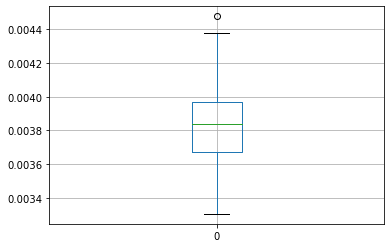

In [255]:
pd.DataFrame(trials).boxplot(showfliers=True)

#### ***For "through-entrances": median (over 146 signals) of mean amplitudes***

In [248]:
wbd2 = np.abs(stack_dataset(wbdset2))
print(f"{np.median(np.apply_along_axis(np.mean, 1, wbd2)):.4f}")

0.0050


# Looking at the DURATION of wingbeat signals for "free-flight" vs "through-entrances"

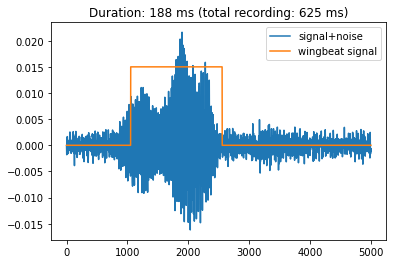

In [297]:
sig = wbdset1[0][0]
plt.plot(sig.numpy().T)
sig = pd.Series(sig.squeeze())
sig = sig.abs().rolling(250).mean()
sig = (sig>0.0025).astype(int)
sig = sig.apply(lambda x: 0.015 if x == 1 else 0)
sig.plot();
plt.legend(['signal+noise','wingbeat signal']);
plt.title(f"Duration: {sig[sig>0].shape[0]/8000.*1000:.0f} ms (total recording: 625 ms)");

#### ***For "free-flight": 100 trials sampling 146 free-flight signals (out of 915 total) with replacement***

In [ ]:
sample = 146

dsname = "twin_cages_experiment/sensorSD/freeflight"

trials = []
for i in range(100):
    wbdset = WingbeatsDataset(dsname=dsname, sample=sample, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
    dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
    trials.append(get_WBduration_from_loader(dloader, fs=fs)[1:])

In [299]:
print(f"mean duration: {np.mean([trials[i][0] for i in range(len(trials))]):.2f} ms")
print(f"median duration: {np.mean([trials[i][1] for i in range(len(trials))]):.2f} ms")

mean duration: 348.37 ms
median duration: 353.40 ms


#### ***For "through-entrances"***

In [ ]:
dsname = "twin_cages_experiment/sensorSD/through_entrances_v2"

wbdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
z = get_WBduration_from_loader(dloader, fs=fs)[1:]

In [347]:
print(f"mean duration: {z[0]:.2f} ms")
print(f"median duration: {z[1]:.2f} ms")

mean duration: 403.00 ms
median duration: 491.44 ms


# Using tsfresh to automatically extract hundreds of features per time-series

### Reading dataframes with free-flight and through-entrances signals

In [8]:
df_through = pd.read_csv('./data_created/tsfresh_throughV2_SD.csv')
df_through.drop('Unnamed: 0', inplace=True, axis=1)

df_free = pd.read_csv('./data_created/tsfresh_free_SD.csv')
df_free.drop('Unnamed: 0', inplace=True, axis=1)

### Concatenating them together

In [5]:
big = pd.concat([df_free, df_through])

In [6]:
big.sample(3)

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_2,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1
895,0.0,0.0,0.0,0.0,0.000519,0.047064,0.000685,-7.497638e-08,6.064174e-08,-0.000013,...,0.079983,0.079983,0.190068,0.294982,1.196168,1.481262,2.341587,3.291012,4.326841,5.409208
156,0.0,0.0,0.0,0.0,27.891397,1.000001,0.000060,-9.437578e-08,-4.705950e-08,0.000169,...,0.045395,0.090729,0.090729,0.090729,0.226363,0.695118,0.814248,0.927148,1.029200,1.127700
449,0.0,0.0,0.0,0.0,-0.017671,0.106354,0.001408,-8.074704e-07,-3.398717e-07,-0.000009,...,0.163982,0.163982,0.235155,0.359290,1.057337,1.446012,2.270520,3.180033,4.178411,5.215321


### Scaling each column to be from 0 to 1

In [7]:
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler(feature_range=(0,1))
df_big = pd.DataFrame(msc.fit_transform(big), columns=df_free.columns.tolist())

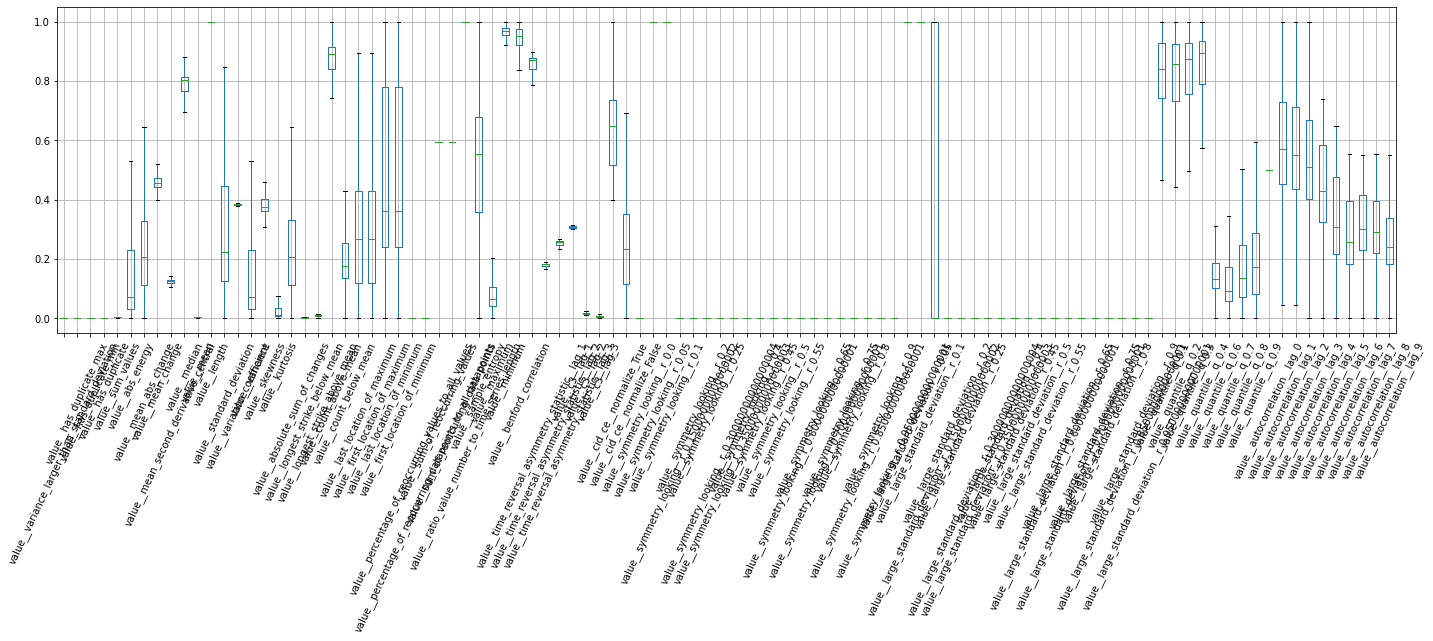

In [362]:
plt.figure(figsize=(24,6));
df_big.iloc[:,:100].boxplot(showfliers=False, rot=65);

### Mean differences between scaled features

In [338]:
free = df_big.iloc[:df_free.shape[0],:]
through = df_big.iloc[df_free.shape[0]:,:]

#### Features that differ (absolute difference) more than 0.5 between free-flight and through-entrances

What these feature names mean: https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html

In [341]:
diff = free.mean() - through.mean()
q = diff[diff.abs()>0.5].index

for i in q:
    print(i)

value__sum_values
value__mean
value__length
value__longest_strike_below_mean
value__count_above_mean
value__count_below_mean
value__last_location_of_minimum
value__first_location_of_minimum
value__sample_entropy
value__c3__lag_2
value__c3__lag_3
value__cid_ce__normalize_True
value__autocorrelation__lag_3
value__autocorrelation__lag_4
value__autocorrelation__lag_5
value__autocorrelation__lag_6
value__autocorrelation__lag_7
value__autocorrelation__lag_8
value__autocorrelation__lag_9
value__agg_autocorrelation__f_agg_"mean"__maxlag_40
value__agg_autocorrelation__f_agg_"median"__maxlag_40
value__number_cwt_peaks__n_1
value__number_cwt_peaks__n_5
value__number_peaks__n_1
value__number_peaks__n_3
value__number_peaks__n_5
value__number_peaks__n_10
value__number_peaks__n_50
value__binned_entropy__max_bins_10
value__index_mass_quantile__q_0.8
value__index_mass_quantile__q_0.9
value__spkt_welch_density__coeff_2
value__ar_coefficient__coeff_2__k_10
value__ar_coefficient__coeff_3__k_10
value__ar_c

# Main wingbeat frequencies

In [368]:
def find_mainwbf(x):
    peaks, _ = find_peaks(x, height=0.0008)
    wbfs = [i for i in peaks if i > 250]
    if len(wbfs):
        return wbfs[0]
    return np.nan

def make_mainWBF_df(psds=None):
    import multiprocessing
    cpus = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cpus)
    result_list = []
    result_list.append(pool.map(find_mainwbf, psds))
    pool.close()
    df = pd.DataFrame(result_list[0], columns=['mainWBF'])
    return df

In [369]:
# all_dfs = []
# species = []
# for i, spec in enumerate(data.target_classes):
#     sub = data.df[data.labels == spec]
#     print(f"{spec}: {sub.shape[0]}")
#     mat = make_df_parallel(names = sub.fnames.tolist(), setting='psd').values
#     pd.DataFrame(mat).to_csv(f"{TEMP_DATADIR}/{spec}_matrix.csv")
#     species.append(spec)
#     mat_rows = [mat[i] for i in range(len(mat))]
#     all_dfs.append(make_mainWBF_df(psds=mat_rows))
#     del mat
#     del mat_rows

array([[<AxesSubplot:title={'center':'mainWBF'}>]], dtype=object)

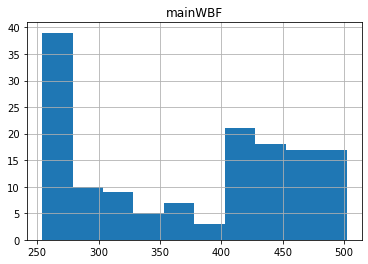

In [389]:
from scipy.signal import find_peaks
wbf = [find_mainwbf(psdset2[i][0].squeeze()) for i in range(len(psdset2))]

psds = np.array([psdset2[i][0].squeeze() for i in range(len(psdset2))])
make_mainWBF_df(psds).hist()

array([[<AxesSubplot:title={'center':'mainWBF'}>]], dtype=object)

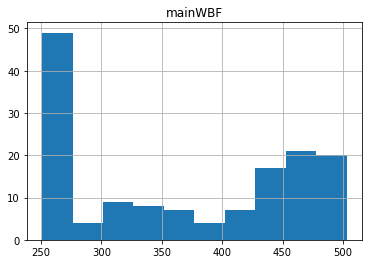

In [392]:
psds = np.array([psdset1[i][0].squeeze() for i in range(len(psdset1))])
make_mainWBF_df(psds).hist()

In [395]:
make_mainWBF_df(psds).value_counts()

mainWBF
254        8
260        5
253        5
483        5
251        3
          ..
444        1
445        1
446        1
450        1
413        1
Length: 92, dtype: int64

# Clustering

In [9]:
big.describe()

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_2,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1
count,1120.0,1120.0,1120.0,1120.000000,1120.000000,1120.000000,1120.000000,1.120000e+03,1.120000e+03,1120.000000,...,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,0.0,0.0,0.0,0.111607,3.339813,0.369842,0.001618,3.549529e-09,1.274164e-09,-0.000111,...,0.092199,0.137402,0.198674,0.291692,0.825104,1.291866,1.966262,2.707465,3.499711,4.311818
std,0.0,0.0,0.0,0.315023,7.429237,0.380866,0.001191,9.420078e-07,4.269992e-07,0.000284,...,0.031943,0.044992,0.055927,0.091993,0.372182,0.262349,0.521280,0.817397,1.146169,1.490255
min,0.0,0.0,0.0,0.000000,-0.135411,0.012989,0.000045,-5.799348e-06,-1.675083e-06,-0.002814,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.586078,0.667453,0.746288,0.821556,0.894610
25%,0.0,0.0,0.0,0.000000,-0.003598,0.086568,0.000817,-1.823886e-07,-7.883725e-08,-0.000149,...,0.079983,0.090729,0.159721,0.215617,0.650232,1.343731,2.075849,2.879565,3.723032,4.583275
50%,0.0,0.0,0.0,0.000000,0.002631,0.189927,0.001449,-3.606824e-08,-1.856945e-08,-0.000020,...,0.079983,0.146946,0.200814,0.294982,0.825360,1.405449,2.191178,3.062752,3.996578,4.948628
75%,0.0,0.0,0.0,0.000000,0.018649,0.569809,0.002294,2.039592e-07,5.268776e-08,0.000018,...,0.110453,0.159721,0.239211,0.359290,1.071290,1.442849,2.264946,3.175805,4.163617,5.183450
max,0.0,0.0,0.0,1.000000,36.095545,2.418033,0.006868,6.851528e-06,1.162024e-05,0.000669,...,0.210883,0.275463,0.367289,0.566133,1.658738,1.496522,2.367676,3.335849,4.396316,5.496577


In [21]:
import faiss
features = np.ascontiguousarray(np.float32(big.values))
n_samples, dim = big.shape
kmeans = faiss.Kmeans(dim, 2)
kmeans.n_iter, kmeans.min_points_per_centroid, kmeans.max_points_per_centroid = 20,5,1000000000

In [22]:
kmeans.train(features)

3942932500000.0

In [23]:
kmeans.train(features)
_, cluster_assignments = kmeans.index.search(features,1)

In [27]:
import seaborn as sns
sns.set()

<AxesSubplot:>

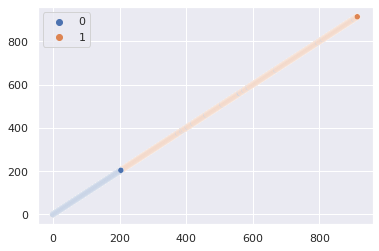

In [32]:
sns.scatterplot(x=big.index.values, y=big.index.values, hue=cluster_assignments.squeeze())

In [31]:
big.index.values

array([  0,   1,   2, ..., 202, 203, 204])

In [10]:
df_through = pd.read_csv('./data_created/tsfresh_throughV2_SD.csv')
df_through.drop('Unnamed: 0', inplace=True, axis=1)

df_free = pd.read_csv('./data_created/tsfresh_free_SD.csv')
df_free.drop('Unnamed: 0', inplace=True, axis=1)

In [14]:
big = pd.concat([df_free, df_through])

In [29]:
dsname = "twin_cages_experiment/sensorSD/freeflight"
transforms_list = [FilterWingbeat(setting='bandpass')]#, TransformWingbeat(setting='psd')]

wbdset_free = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
psdset1_free = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader1_free = DataLoader(wbdset_free, batch_size=32, num_workers=16)

Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.
Found 915 in dataset: twin_cages_experiment/sensorSD/freeflight, and 1 label(s): ['sensorSD']
No custom label applied.


In [30]:
dsname = "twin_cages_experiment/sensorSD/through_entrances_v2"
transforms_list = [FilterWingbeat(setting='bandpass')]#, TransformWingbeat(setting='psd')]

wbdset_through = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
psdset_through = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader_through = DataLoader(wbdset_through, batch_size=32, num_workers=16)

Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.
Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.


In [38]:
def stack_dataset(d):
    return np.array([d[i][0].numpy() for i in range(len(d))]).squeeze()


free_mat = stack_dataset(wbdset_free)
through_mat = stack_dataset(wbdset_through)

In [41]:
df = pd.DataFrame()
for i, ts in enumerate(through_mat):
    data = [[x, i] for x in ts]
    df = df.append(data, ignore_index=True)
df.columns = ['value', 'id']

import tsfresh
through_tsfresh=tsfresh.extract_features(df, column_id='id')

Feature Extraction: 100%|██████████| 37/37 [13:13<00:00, 21.45s/it]  


In [43]:
through_tsfresh

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_2,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1
0,0.0,0.0,0.0,0.0,-0.000177,0.072261,0.001082,-3.777734e-07,9.384624e-08,-0.000022,...,0.110453,0.125256,0.204871,0.325140,1.288198,1.447860,2.268963,3.182936,4.180783,5.229197
1,0.0,0.0,0.0,0.0,-0.001838,0.510278,0.003387,-1.195295e-06,2.160453e-07,-0.000473,...,0.110453,0.159721,0.235155,0.329196,0.742947,1.343629,2.057459,2.851666,3.706088,4.562256
2,0.0,0.0,0.0,0.0,-0.009669,0.480409,0.002902,-7.754976e-07,1.341257e-07,-0.000618,...,0.110453,0.155665,0.215617,0.260704,0.819719,1.377527,2.142130,2.979884,3.834288,4.698153
3,0.0,0.0,0.0,0.0,-0.002165,0.055292,0.000871,-7.328109e-08,1.274245e-07,0.000058,...,0.045395,0.125256,0.200814,0.215617,1.108968,1.458453,2.300673,3.241629,4.268294,5.330478
4,0.0,0.0,0.0,0.0,-0.011334,0.824171,0.003936,-3.652968e-06,3.946841e-07,-0.000714,...,0.110453,0.125256,0.215617,0.260704,0.723552,1.244523,1.870100,2.552492,3.270835,4.020602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.0,0.0,0.0,1.0,0.021585,0.197577,0.002426,5.883742e-07,4.311985e-08,0.000001,...,0.110453,0.183378,0.215617,0.325140,0.757974,1.401198,2.189544,3.026388,3.912143,4.833033
142,0.0,0.0,0.0,1.0,-0.029008,0.430639,0.003010,5.035341e-07,-1.313699e-07,-0.000063,...,0.110453,0.110453,0.170467,0.280179,0.700750,1.348084,2.078887,2.872317,3.717608,4.582343
143,0.0,0.0,0.0,0.0,-0.012443,0.152892,0.001976,7.761842e-07,2.710634e-07,-0.000023,...,0.110453,0.190068,0.249958,0.271451,0.782326,1.360498,2.140049,2.987989,3.856076,4.723978
144,0.0,0.0,0.0,0.0,-0.012993,0.284464,0.001948,-8.050228e-08,8.307801e-08,0.000078,...,0.079983,0.155665,0.215617,0.294982,0.929963,1.362312,2.110013,2.943063,3.835790,4.754813


In [44]:
df = pd.DataFrame()
for i, ts in enumerate(free_mat):
    data = [[x, i] for x in ts]
    df = df.append(data, ignore_index=True)
df.columns = ['value', 'id']

free_tsfresh=tsfresh.extract_features(df, column_id='id')

Feature Extraction: 100%|██████████| 40/40 [1:30:07<00:00, 135.19s/it]  


In [70]:
df = pd.concat([free_tsfresh, through_tsfresh], axis=0)#.to_csv('./data_created/tsfresh_all.csv')
df['label'] = '0'
# through_tsfresh
# free_tsfresh

In [71]:
df.iloc[:915,:].label = 'fr'

/home/kalfasyan/anaconda3/envs/wbai/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [72]:
df.iloc[915:,:].label = 'th'

In [76]:
df.to_csv('./data_created/tsfresh_free_vsthrough.csv')

In [85]:
stacked_mat = np.vstack((free_mat,through_mat))

In [86]:
np.save('./data_created/free_through_mats_stacked.npy', stacked_mat)